In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,log_loss,recall_score,accuracy_score,precision_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sma
from collections import Counter
from subprocess import check_output
from statsmodels.graphics.gofplots import qqplot

In [2]:
df= pd.read_csv(r'C:\Users\aaparajit\Desktop\Nerdville Horror\Py_Credit_Fraud_Detection_Kaggle_GBM\creditcard.csv',index_col=0)

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
Counter(df.Class)

Counter({0: 284315, 1: 492})

In [6]:
# we can conclude from the ratio that there is class imbalance
# there are over 280 k instances of non-fraud and only 490 instances of fraud

Text(0.5,0,'Amount in USD')

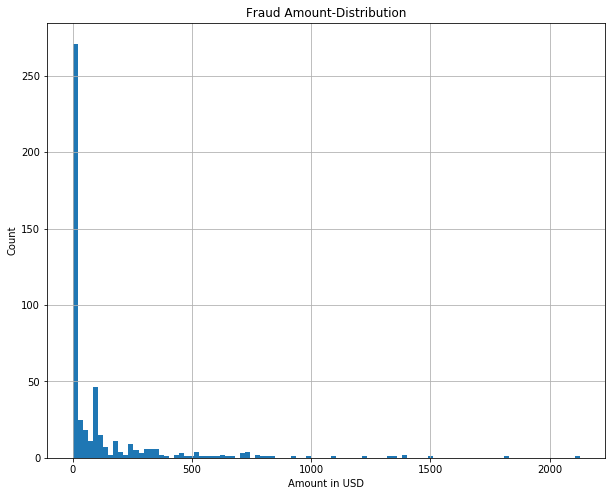

In [7]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
df[df['Class']==1]['Amount'].hist(bins=100)
plt.title('Fraud Amount-Distribution')
plt.ylabel('Count')
plt.xlabel('Amount in USD')

In [8]:
# We can conclude there are no large frauds

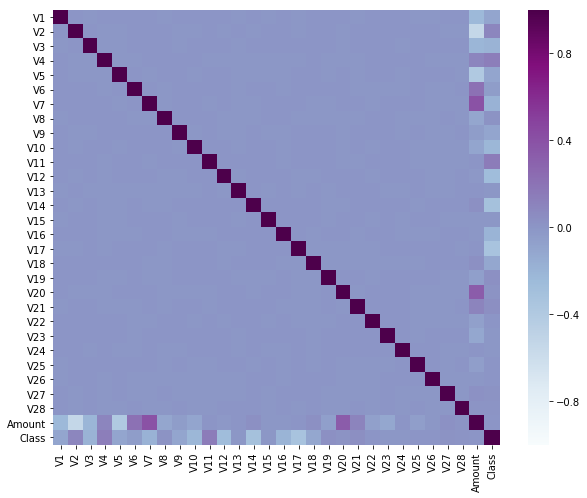

In [9]:
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='BuPu')

In [10]:
corrs_amt=df.drop('Class',axis=1).corr()['Amount']

In [11]:
print(corrs_amt[np.abs(corrs_amt)>0.3])

V2       -0.531409
V5       -0.386356
V7        0.397311
V20       0.339403
Amount    1.000000
Name: Amount, dtype: float64


In [12]:
vars=['Amount','V20','V7','V5','V2']

In [13]:
print(df[vars].corr())

          Amount           V20            V7            V5            V2
Amount  1.000000  3.394034e-01  3.973113e-01 -3.863563e-01 -5.314089e-01
V20     0.339403  1.000000e+00  1.744242e-16  2.076048e-16 -9.309954e-16
V7      0.397311  1.744242e-16  1.000000e+00 -4.209851e-16  3.966486e-16
V5     -0.386356  2.076048e-16 -4.209851e-16  1.000000e+00 -2.039868e-16
V2     -0.531409 -9.309954e-16  3.966486e-16 -2.039868e-16  1.000000e+00


* Since these variables seem to be correlated with the amount trying to fit a linear regrssion model 

# Linear Regression

In [14]:
linear_mod=sma.OLS(exog=df[['V20','V7','V5','V2']],endog=df[['Amount']])
linear_fit=linear_mod.fit()

In [15]:
print(linear_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 1.195e+05
Date:                Fri, 14 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:15:02   Log-Likelihood:            -1.8533e+06
No. Observations:              284807   AIC:                         3.707e+06
Df Residuals:                  284803   BIC:                         3.707e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V20          110.1166      0.394    279.471      0.0

In [16]:
linear_pred=linear_fit.predict()
linear_pred_df=pd.DataFrame(linear_pred,index=df.index)

In [17]:
linear_pred_df.head(3)

,0
Time,
0.0,76.476722
0.0,-39.562287
1.0,264.488946


Text(0,0.5,'USD')

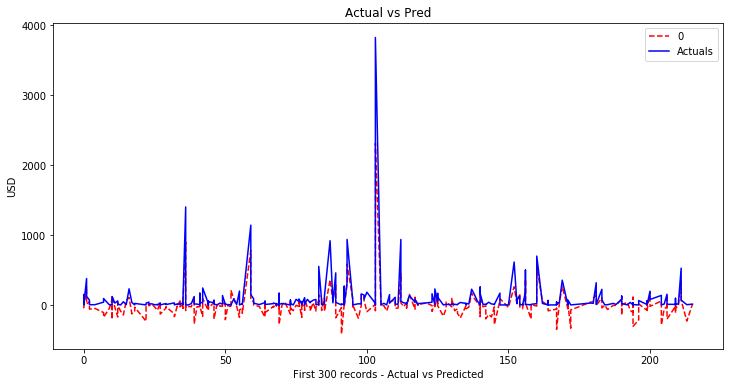

In [18]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
linear_pred_df.iloc[:300].plot(ax=ax,style=['r--'],label='Predicted',legend=True);
df.Amount.iloc[:300].plot(ax=ax,style=['b-'],label='Actuals',legend=True);
plt.title('Actual vs Pred');
plt.xlabel('First 300 records - Actual vs Predicted');
plt.ylabel('USD')

* The Linear model predicts negative fraud which isnt reasonable so trying to experiment with other models

# Logistic regression

In [19]:
# Attmpting to classify an occurance as either fraud or non-fraud basis the Class variable

* Oversampling

In [20]:
# Synthetic Minority oversampling technique
from imblearn.over_sampling import SMOTE

In [22]:
y_full=df['Class']
x_full=df.drop(columns=(['Class','Amount']),axis=1)

In [23]:
ism=SMOTE(random_state=42)

In [24]:
x_rs,y_rs=ism.fit_sample(x_full,y_full)

In [26]:
Counter(y_rs)

Counter({0: 284315, 1: 284315})

* So we see the cases of fraud have been oversampled to eliminate class imbalance

In [27]:
x_rs=pd.DataFrame(x_rs,columns=x_full.columns)
y_rs=pd.DataFrame(y_rs)

In [28]:
# trying to identify correlated variables as earlier and fitting a logistic regression model

In [32]:
corrs=df.drop('Amount',axis=1).corr()['Class']
print(corrs[np.abs(corrs)>0.15])

V3      -0.192961
V7      -0.187257
V10     -0.216883
V11      0.154876
V12     -0.260593
V14     -0.302544
V16     -0.196539
V17     -0.326481
Class    1.000000
Name: Class, dtype: float64


In [33]:
# proceedign with these nine variables

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_rs, y_rs, test_size=0.35, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import auc,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [39]:
lr_mod=sma.Logit(endog=y_train,exog=sma.add_constant(pd.DataFrame(x_train,columns=x_rs.columns)[['V3','V7','V10','V11','V12','V14','V16','V17']]))

In [40]:
lr_mod_fit=lr_mod.fit()

Optimization terminated successfully.
         Current function value: 0.183750
         Iterations 12


In [45]:
print(lr_mod_fit.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.735      
Dependent Variable: 0.0000           AIC:              135849.5713
Date:               2018-09-14 15:00 BIC:              135946.9531
No. Observations:   369609           Log-Likelihood:   -67916.    
Df Model:           8                LL-Null:          -2.5619e+05
Df Residuals:       369600           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -2.4614     0.0089   -276.2272   0.0000   -2.4788   -2.4439
V3       -0.0849     0.0050    -16.9010   0.0000   -0.0948   -0.0751
V7        0.1372     0.0056     24.3065   0.0000    0.1261    0.1483
V10      

In [47]:
lr_mod_pred=lr_mod_fit.predict(sma.add_constant(pd.DataFrame(x_test,columns=x_rs.columns)[['V3','V7','V10','V11','V12','V14','V16','V17']]))

In [48]:
print(lr_mod_pred.head())

437378    0.999964
504222    0.999759
4794      0.192441
388411    0.999998
424512    0.996427
dtype: float64


In [49]:
# with this we get the predicted probabilities for classes 
# deciding on a threshold of 0.5 we can get the predicted class 

In [50]:
lr_mod_pred_round=lr_mod_pred.round(0).astype(int)

In [51]:
lr_mod_pred_round.head()

437378    1
504222    1
4794      0
388411    1
424512    1
dtype: int32

In [52]:
print(classification_report(lr_mod_pred_round,y_test))

             precision    recall  f1-score   support

          0       0.98      0.90      0.93    108509
          1       0.89      0.98      0.93     90512

avg / total       0.94      0.93      0.93    199021



In [53]:
print(confusion_matrix(lr_mod_pred_round,y_test))

[[97178 11331]
 [ 2260 88252]]


In [55]:
print(roc_auc_score(lr_mod_pred_round,y_test))

0.9353032086713444


In [56]:
# area under AUC curve is 0.93 and from the precision and recall scores we can conclude that this is a decent model
# Next attempting Undersampling 

* Undersampling

In [57]:
from imblearn.under_sampling import RandomUnderSampler

In [58]:
rus=RandomUnderSampler(random_state=42)

In [59]:
x_rs,y_rs=rus.fit_sample(x_full,y_full)

In [60]:
Counter(y_rs)

Counter({0: 492, 1: 492})

In [61]:
x_rs=pd.DataFrame(x_rs,columns=x_full.columns)
y_rs=pd.DataFrame(y_rs)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_rs, y_rs, test_size=0.35, random_state=42)

In [64]:
lr_us_mod=sma.Logit(endog=y_train,exog=sma.add_constant(pd.DataFrame(x_train,columns=x_rs.columns)[['V3','V7','V10','V11','V12','V14','V16','V17']]))

In [67]:
lr_us_mod_fit=lr_us_mod.fit()
print(lr_us_mod_fit.summary2())

Optimization terminated successfully.
         Current function value: 0.189197
         Iterations 11
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.727      
Dependent Variable: 0.0000           AIC:              259.7938   
Date:               2018-09-14 15:25 BIC:              299.9329   
No. Observations:   639              Log-Likelihood:   -120.90    
Df Model:           8                LL-Null:          -442.86    
Df Residuals:       630              LLR p-value:      8.3853e-134
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     11.0000                                       
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -2.3603     0.2050   -11.5144   0.0000   -2.7621   -1.9585
V3        -0.1233     0.1213    -1.0167   0.

In [68]:
lr_us_mod_pred=lr_us_mod_fit.predict(sma.add_constant(pd.DataFrame(x_test,columns=x_rs.columns)[['V3','V7','V10','V11','V12','V14','V16','V17']]))

In [69]:
lr_us_mod_pred_rnd=lr_us_mod_pred.round(0).astype(int)

In [70]:
lr_us_mod_pred_rnd.head()

613    1
451    0
731    1
436    0
275    0
dtype: int32

In [71]:
print(classification_report(lr_us_mod_pred_rnd,y_test))

             precision    recall  f1-score   support

          0       0.97      0.90      0.93       191
          1       0.89      0.97      0.93       154

avg / total       0.93      0.93      0.93       345



* Combined Sampling

In [72]:
# now let us try to use SMOTE and ENN (Edited nearest neighbours)
# This method first oversamples data and then uses nearest neighbours algorithm to fine tune the data
# also drops data that it decides is outside it's set threshold

Edited Nearest Neighbor removes any example whose class label differs
from the class of at least two of its three nearest neighbors. 
The ENN method removes the instances of the majority class whose prediction
made by KNN method is different from the majority class.
ENN method can remove both the noisy examples as borderline examples, 
providing a smoother decision surface. ENN tends to remove more examples than the Tomek links does, 
so it is expected that it will provide a more in depth data cleaning

In [73]:
from imblearn.combine import SMOTEENN

In [74]:
cse=SMOTEENN(random_state=42)

In [75]:
x_rs,y_rs=cse.fit_sample(x_full,y_full)

In [76]:
Counter(y_rs)

Counter({0: 283907, 1: 284315})

In [77]:
x_rs = pd.DataFrame(x_rs, columns = x_full.columns)
y_rs = pd.DataFrame(y_rs)

* lightgbm

In [78]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'learning_rate': 0.05, 
    'max_depth': 5,
    'num_leaves': 92, 
    'min_data_in_leaf': 46, 
    'lambda_l1': 1.0,
    'feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq': 5}

kfolds = 3
kd = 0
preds = 0

In [79]:
for i in range(kfolds):
    print('In kfold:',str(i+1))
    xt,xv,yt,yv = train_test_split(x_rs, y_rs, test_size=0.2, random_state=(i*42))
    
    trn = lgb.Dataset(xt,yt.values.flatten())
    val = lgb.Dataset(xv,yv.values.flatten())
    model = lgb.train(params, train_set=trn, num_boost_round=100,
                     valid_sets=[val], valid_names=['val'],
                     verbose_eval=20,
                     early_stopping_rounds=40)
    
    pred = model.predict(xv, num_iteration=model.best_iteration+50)
    preds += pred
    kd += 1
    print('=========================')
    print("    Precision : {:.4f}".format(precision_score(np.round(pred,0).astype(int), yv)))
    print("    Recall    : {:.4f}".format(recall_score(np.round(pred,0).astype(int), yv)))
    print("    Accuracy  : {:.4f}".format(accuracy_score(np.round(pred,0).astype(int), yv)))
    print("ROC/AUC Score : {:.4f}".format(roc_auc_score(np.round(pred,0).astype(int), yv)))
    print("    F1 Score  : {:.4f}".format( 2*(precision_score(np.round(pred,0).astype(int), yv)*recall_score(np.round(pred,0).astype(int), yv)) \
                                        / (precision_score(np.round(pred,0).astype(int), yv)+recall_score(np.round(pred,0).astype(int), yv)) ))
    print('=========================')
preds /= kd

In kfold: 1
Training until validation scores don't improve for 40 rounds.
[20]	val's binary_logloss: 0.267241
[40]	val's binary_logloss: 0.144916
[60]	val's binary_logloss: 0.0985239
[80]	val's binary_logloss: 0.0762635
[100]	val's binary_logloss: 0.0633103
Did not meet early stopping. Best iteration is:
[100]	val's binary_logloss: 0.0633103
    Precision : 0.9748
    Recall    : 0.9918
    Accuracy  : 0.9833
ROC/AUC Score : 0.9834
    F1 Score  : 0.9832
In kfold: 2
Training until validation scores don't improve for 40 rounds.
[20]	val's binary_logloss: 0.267512
[40]	val's binary_logloss: 0.145704
[60]	val's binary_logloss: 0.0992969
[80]	val's binary_logloss: 0.0769069
[100]	val's binary_logloss: 0.0624274
Did not meet early stopping. Best iteration is:
[100]	val's binary_logloss: 0.0624274
    Precision : 0.9740
    Recall    : 0.9917
    Accuracy  : 0.9829
ROC/AUC Score : 0.9831
    F1 Score  : 0.9828
In kfold: 3
Training until validation scores don't improve for 40 rounds.
[20]	val

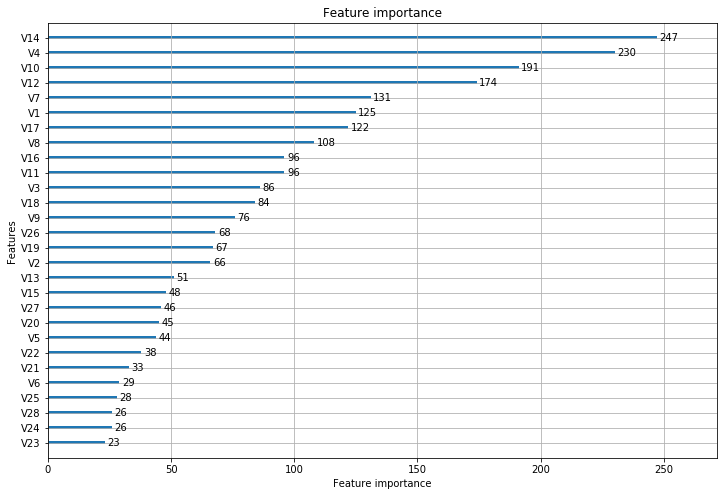

In [80]:
lgb.plot_importance(model, figsize=(12,8))

#END!